## Classification metrics

Choosing right evaluation metrics for the problem is one of the most important aspect of machine learning. Choice of metrics allows us to compare performance of different models and helps in model selection.

In this task, we will explore following metrics:
- confusion matrix
- accuracy
- precision
- recall
- f1 score

#### Dataset
The training dataset is available at "data/ozone_levels_train.csv" in the respective challenge' repo.<br>
The testing dataset is available at "data/ozone_levels_test.csv" in the respective challenge' repo.<br>

The dataset is __modified version__ of the dataset 'ozone level' on provided by UCI Machine Learning repository.

Original dataset: https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

#### Objective
To learn about classification metrics and compare logistic regression and decision tree on the same dataset

#### Tasks
- define X(input) and Y(output)
- train the decision tree model 
- train the logistic model
- construct a confusion matrix
- calculate the classification accurace
- calculate the Precision
- calculate the Recall
- calculate the F1 score
- calculate Area Under ROC Curve

#### Further fun
- Calculate precission and recall
- find the area under the curve for Roc metrics
- impliment below metrics using inbuilt librarires
        confusion matrix
        accuracy
        precision
        recall
        f1 score


#### Helpful links
- Classification metrics with google developers: https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative
- classification metrics: https://www.kdnuggets.com/2020/04/performance-evaluation-metrics-classification.html
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Differences between Logistic Regression and a Decision Tree: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification/
- Decision Tree Classifier by Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Understanding classification metrics like Precision, Recall, F-Scores and Confusion matrices: https://nillsf.com/index.php/2020/05/23/confusion-matrix-accuracy-recall-precision-false-positive-rate-and-f-scores-explained/
- Understanding the ROC Curve: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
- Use slack for doubts: https://join.slack.com/t/deepconnectai/shared_invite/zt-givlfnf6-~cn3SQ43k0BGDrG9_YOn4g

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Uncomment below 2 lines to ignore warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Load the train and test data
train = pd.read_csv('data/ozone_levels_train.csv')
test  = pd.read_csv('data/ozone_levels_test.csv')

In [3]:
# Explore train dataset
train.describe()

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,...,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,1.659582,1.604478,1.562795,1.536850,1.546754,1.565504,1.658954,2.060432,2.546532,2.853759,...,0.301490,9.996660,0.767693,5818.118749,10.228275,37.193733,10164.328252,0.326615,0.400109,0.029296
std,1.207315,1.215479,1.182878,1.144698,1.149555,1.121924,1.106174,1.102371,1.119705,1.148799,...,0.240462,9.085121,6.945460,76.968772,20.246423,11.053242,51.959469,35.038533,1.447307,0.168682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,...,0.010000,-14.920000,-22.480000,5545.000000,-56.700000,-10.100000,9975.000000,-130.000000,0.000000,0.000000
25%,0.800000,0.700000,0.700000,0.700000,0.700000,0.700000,0.900000,1.300000,1.800000,2.100000,...,0.100000,3.535000,-3.300000,5770.000000,-2.850000,32.825000,10130.000000,-20.000000,0.000000,0.000000
50%,1.600000,1.500000,1.400000,1.400000,1.400000,1.500000,1.600000,2.048331,2.540472,2.848599,...,0.250000,9.867313,0.831892,5825.000000,12.900000,40.350000,10160.000000,-0.130416,0.000000,0.000000
75%,2.200000,2.100000,2.100000,2.100000,2.100000,2.000000,2.100000,2.600000,3.200000,3.500000,...,0.460000,16.135000,4.380000,5880.000000,27.525000,44.850000,10190.000000,15.000000,0.050000,0.000000
max,7.500000,7.700000,7.100000,7.300000,7.200000,7.400000,7.400000,7.500000,8.400000,8.500000,...,1.000000,42.360000,30.420000,5965.000000,42.050000,59.150000,10350.000000,140.000000,20.650000,1.000000


In [10]:
train.head(10)

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_63,F_64,F_65,F_66,F_67,F_68,F_69,F_70,F_71,class
0,2.500000,3.500000,4.40000,4.600000,4.400000,3.500000,4.200000,4.500000,4.200000,4.600000,...,0.07,26.290000,-2.370000,5705.0,-19.40,23.40,10315.0,-0.130416,0.00,0.0
1,1.200000,0.700000,0.30000,0.100000,0.300000,0.400000,0.600000,1.100000,1.900000,2.400000,...,0.24,15.800000,2.100000,5710.0,-17.50,19.00,10210.0,15.000000,0.00,0.0
2,0.100000,0.400000,0.60000,0.400000,1.000000,1.700000,0.700000,1.300000,2.300000,2.400000,...,0.12,31.640000,-5.240000,5745.0,-16.90,25.90,10175.0,85.000000,0.00,0.0
3,0.600000,0.900000,1.00000,0.600000,0.700000,0.700000,0.800000,1.400000,2.600000,2.600000,...,0.19,1.220000,-0.280000,5835.0,-9.55,42.15,10215.0,5.000000,0.00,0.0
4,0.100000,0.400000,0.30000,0.100000,0.100000,0.000000,0.900000,1.900000,2.000000,2.000000,...,0.87,1.650000,1.510000,5835.0,32.95,47.30,10170.0,15.000000,0.97,0.0
5,1.800000,3.000000,2.80000,1.400000,0.600000,0.300000,1.400000,2.600000,2.700000,3.200000,...,0.23,16.440000,18.490000,5780.0,22.15,49.65,10055.0,40.000000,0.00,0.0
6,1.641261,1.587433,1.54661,1.527273,1.523094,1.542914,1.638218,2.048331,2.540472,2.848599,...,0.28,13.600000,-3.260000,5735.0,-12.30,22.80,10200.0,-30.000000,0.00,0.0
7,0.900000,1.300000,2.00000,1.800000,1.600000,1.900000,1.800000,2.500000,3.200000,4.100000,...,0.25,9.867313,0.831892,5705.0,-6.40,18.50,10165.0,125.000000,0.00,0.0
8,1.641261,1.587433,1.54661,1.527273,1.523094,1.542914,1.638218,2.048331,2.540472,2.848599,...,0.07,0.180000,6.780000,5895.0,24.85,39.85,10155.0,5.000000,0.58,0.0
9,2.500000,2.400000,2.10000,2.300000,2.200000,2.000000,1.600000,2.600000,3.600000,4.500000,...,0.26,11.330000,-13.350000,5545.0,12.30,44.60,10180.0,-10.000000,0.00,0.0


In [22]:
# Define X and y
X_train = train.drop('class', axis = 1).values
X_test  = test.drop('class', axis = 1).values
y_train = train['class']
y_test  = test['class']

In [26]:
# Print shape of X_train, X_test, y_train, y_test
print(f'''
      X_train shape : {X_train.shape}
      X_test shape : {X_test.shape}
      y_train shape : {y_train.shape}
      y_test shape : {y_test.shape}
            
''')


      X_train shape : (1775, 72)
      X_test shape : (761, 72)
      y_train shape : (1775,)
      y_test shape : (761,)
            



In [31]:
# Initialize the models
# Classifier 1 - Logistic regression
clf1 = LogisticRegression(max_iter=10000)
# Classifier 2 - Decision tree
clf2 = DecisionTreeClassifier()

In [32]:
# Train both the models on training dataset
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
# Predict on testing data
y_pred_lr = clf1.predict(X_test)
y_pred_dt = clf2.predict(X_test)
sum(y_pred_lr ==  y_test)/ len(y_test) , sum(y_pred_dt ==  y_test)/ len(y_test)  

(0.961892247043364, 0.938239159001314)

### Primary building blocks of classification metrics

A __TRUE POSITIVE (TP)__ is an outcome where the model correctly predicts the positive class.

A __TRUE NEGATIVE (TN)__ is an outcome where the model correctly predicts the negative class.

A __FALSE POSITIVE (FP)__ is an outcome where the model incorrectly predicts the positive class.

a __FALSE NEGATIVE (FN)__ is an outcome where the model incorrectly predicts the negative class.

In [47]:
# Compute primary metrics for logisitc regression
# NOTE: All metrics are to be calculated on test dataset
# True Positive
lr_true_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_lr[i] == 1])
# True Negative
lr_true_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_lr[i] == 0])
# False Positive
lr_false_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_lr[i] == 1])
# False Negative
lr_false_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_lr[i] == 0])

In [48]:
# Compute primary metrics for decision tree
# True Positive
dt_true_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_dt[i] == 1])
# True Negative
dt_true_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_dt[i] == 0])
# False Positive
dt_false_positive = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_dt[i] == 1])
# False Negative
dt_false_negative = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_dt[i] == 0])

### Confusion matrix
A confusion matrix is visualization technique to summarize the basic performance of a classification algorithm.

![Confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg "Confusion matric diagram")

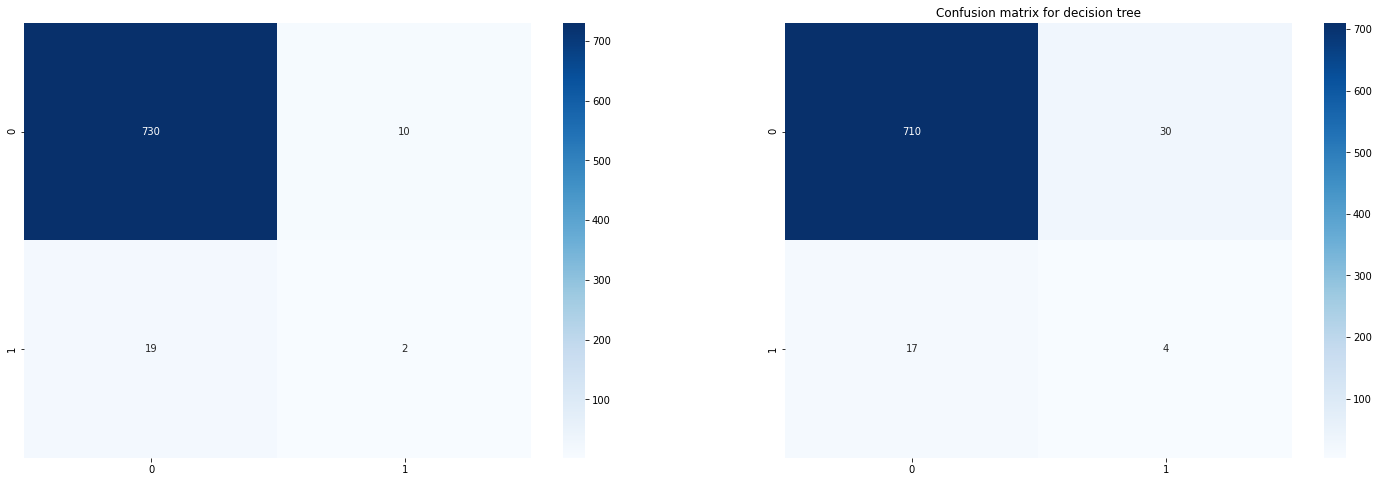

In [49]:
# Plot confusion matrix, DO NOT EDIT THE CELL
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8))

plt.title("Confusion matrix for logistic regression")
sns.heatmap(np.array([[lr_true_negative, lr_false_positive],[lr_false_negative, lr_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[0])
plt.title("Confusion matrix for decision tree")
sns.heatmap(np.array([[dt_true_negative, dt_false_positive],[dt_false_negative, dt_true_positive]]), annot=True, cmap=plt.cm.Blues, fmt='g', ax=axes[1])

plt.show()

### Accuracy 
Classification accuracy is simply the rate of correct classifications
$$Accuracy = \frac{Number \, of \, correct \, predictions}{Total \, number \, of \, predictions}$$
<br>
$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [50]:
# Classification accuracy for logistic regression
lr_accuracy = (lr_true_negative+lr_true_positive)/(lr_false_negative+lr_false_positive+lr_true_negative+lr_true_positive)
# Classification accuracy for decision tree
dt_accuracy = (dt_true_negative+dt_true_positive)/(dt_false_negative+dt_false_positive+dt_true_negative+dt_true_positive)

In [51]:
print("Classificaton accuracy: LR = " , lr_accuracy)
print("Classificaton accuracy: DT = " , dt_accuracy)

Classificaton accuracy: LR =  0.961892247043364
Classificaton accuracy: DT =  0.938239159001314


### Precision
What proportion of positive identifications was actually correct?
$$Precision = \frac{TP}{TP+FP}$$

In [52]:
# Precision for logistic regression
try:
    lr_precision = lr_true_positive/(lr_true_positive+lr_false_positive)
except:
    lr_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for logistic regression turned out to be 0 ")
# Precision for decision tree
try:
    dt_precision = dt_true_positive/(dt_true_positive+dt_false_positive)
except:
    dt_precision = 0
    print("If you see this message, it means that the\ndenominator of precision for decision tree turned out to be 0 ")

In [53]:
print("Precision: LR = " , lr_precision)
print("Precision: DT = " , dt_precision)

Precision: LR =  0.16666666666666666
Precision: DT =  0.11764705882352941


### Recall
What proportion of actual positives was identified correctly?
$$Recall = \frac{TP}{TP+FN}$$

In [54]:
# Recall for logistic regression
try:
    lr_recall = lr_true_positive / (lr_true_positive + lr_false_negative)
except:
    lr_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for logistic regression turned out to be 0 ")
# Recall for decision tree
try:
    dt_recall = dt_true_positive / (dt_true_positive + dt_false_negative) 
except:
    dt_recall = 0
    print("If you see this message, it means that the\ndenominator of recall for decision tree turned out to be 0 ")

In [55]:
print("Recall: LR = " , lr_recall)
print("Recall: DT = " , dt_recall)

Recall: LR =  0.09523809523809523
Recall: DT =  0.19047619047619047


### F1 score
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
$$ F1 \, score = \frac{2* Precision * Recall}{Precision + Recall}$$

In [56]:
# F1 score for logistic regression
lr_f1_score = (2*lr_precision*lr_recall)/(lr_precision+lr_recall)
# F1 score for decision tree
dt_f1_score = (2*dt_precision*dt_recall)/(dt_precision+dt_recall) 

In [57]:
print("F1 score: LR = " , lr_f1_score)
print("F1 score: DT = " , dt_f1_score)

F1 score: LR =  0.12121212121212123
F1 score: DT =  0.14545454545454542


### Area Under ROC Curve
A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [66]:
clf1.predict_proba(X_test).shape

(761, 2)

In [69]:
lr_proba = clf1.predict_proba(X_test)[:,1]
dt_proba = clf2.predict_proba(X_test)[:,1]

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
lr_false_positive_rate, lr_true_positive_rate, lr_thresholds = roc_curve(y_test, lr_proba)
dt_false_positive_rate, dt_true_positive_rate, dt_thresholds =  roc_curve(y_test, dt_proba)

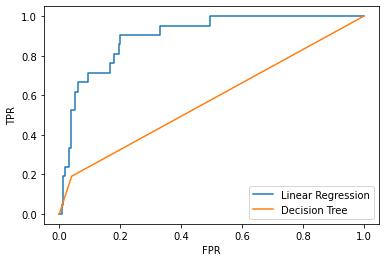

In [76]:
# TODO: Plot the ROC curve
plt.plot(lr_false_positive_rate, lr_true_positive_rate, label="Linear Regression")
plt.plot(dt_false_positive_rate, dt_true_positive_rate, label="Decision Tree")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [79]:
lr_score = roc_auc_score(y_test, lr_proba)
dt_score = roc_auc_score(y_test, dt_proba)

print(f'''
LR score: {lr_score}
DT score: {dt_score}
''')


LR score: 0.8992921492921493
DT score: 0.574967824967825

